# Fraud Analysis Decision Tree Classification # 

In [13]:
# library imports
import re
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from utils import SimpleDataProcessing as SDP
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DTC, plot_tree as PT
from sklearn.metrics import accuracy_score, classification_report

In [38]:
# initialize data processing class with fraud data
data = "~\\Desktop\\data\\finance\\synthetic_fraud_dataset.csv"
processor = SDP(data)

In [40]:
# load data
x_train, x_test, x_val, y_train, y_test, y_val = processor.process_data(target_var='Fraud_Label')
model = processor.make_and_train_tree(x_train, y_train)
processor.evaluate_model(model, x_test, y_test)

Accuracy score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3363
           1       1.00      1.00      1.00      1637

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



I believe I have some correlating variables left

In [35]:
x_train.drop(columns=['Risk_Score', 'Timestamp'], inplace=True)

In [36]:
x_train

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Is_Weekend
39087,80.39,0,32068.28,2,0,4,0,0,5,112.75,4,2,142,3674.33,2,0
30893,196.60,1,94961.81,1,2,1,0,0,8,199.95,1,3,32,796.99,1,0
45278,21.88,0,39354.55,2,3,1,0,0,7,234.75,2,2,203,2286.33,1,1
16398,121.23,2,46138.99,1,0,4,0,0,8,344.98,2,1,137,4924.98,2,0
13653,34.53,2,52750.58,1,3,2,0,0,6,456.77,1,0,8,4924.36,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,41.10,0,65434.90,2,3,4,0,0,4,449.96,1,2,20,4711.17,2,0
44732,3.06,3,2919.34,0,3,4,0,0,13,392.70,4,3,128,1194.91,0,0
38158,98.54,0,28825.33,2,4,2,0,0,1,116.87,0,1,210,1222.38,1,0
860,196.83,3,95836.90,0,0,2,1,0,6,162.36,1,2,213,4700.51,3,0


In [15]:
corr_matrix = x_train.corr()

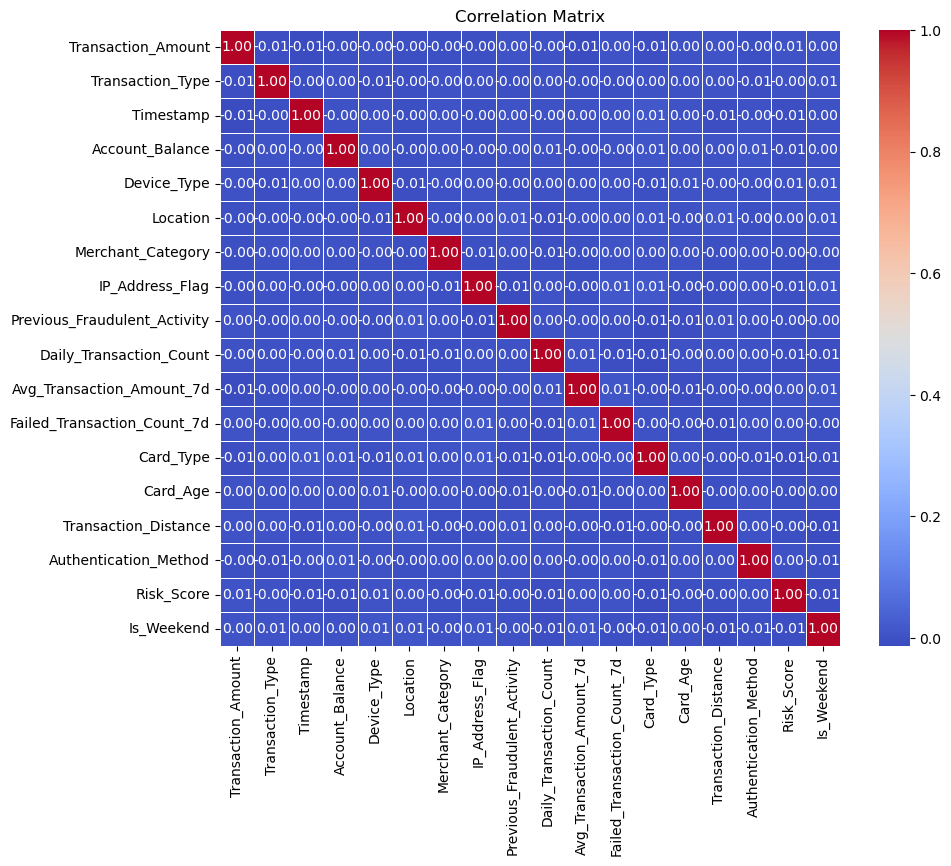

In [16]:
plt.figure(figsize=(10, 8))  # Adjust the size of the plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()